In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout,Flatten

In [ ]:
directory = os.listdir('Images/')
for dire in directory:
    files = list(os.listdir('Images/'+dire))
    print(dire + 'Folder has '+ str(len(files))+ ' Images')

DermatitisFolder has 200 Images
EczemaFolder has 200 Images
non-rashFolder has 200 Images
RingWormFolder has 200 Images


In [ ]:
base_directory = 'Images/'
image_size = 200
batch = 20

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(base_directory, seed = 123 , validation_split = 0.2,
                                                    subset = 'training', batch_size = batch, image_size = (image_size,image_size))

validation = tf.keras.utils.image_dataset_from_directory(base_directory, seed = 123 , validation_split = 0.2,
                                                    subset = 'validation', batch_size = batch, image_size = (image_size,image_size))

Found 800 files belonging to 4 classes.
Using 640 files for training.
Found 800 files belonging to 4 classes.
Using 160 files for validation.


In [ ]:
rash_names = train.class_names

In [ ]:
rash_names

['Dermatitis', 'Eczema', 'RingWorm', 'non-rash']

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE #optimizing data

In [ ]:
train = train.cache().shuffle(450).prefetch(buffer_size = AUTOTUNE)

In [ ]:
valdation = validation.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
dataArgumentation = Sequential([layers.RandomFlip("horizontal", input_shape = (image_size,image_size,3)),
                                layers.RandomRotation(0.1),
                                layers.RandomZoom(0.1)])

In [ ]:
import matplotlib.pyplot as plt

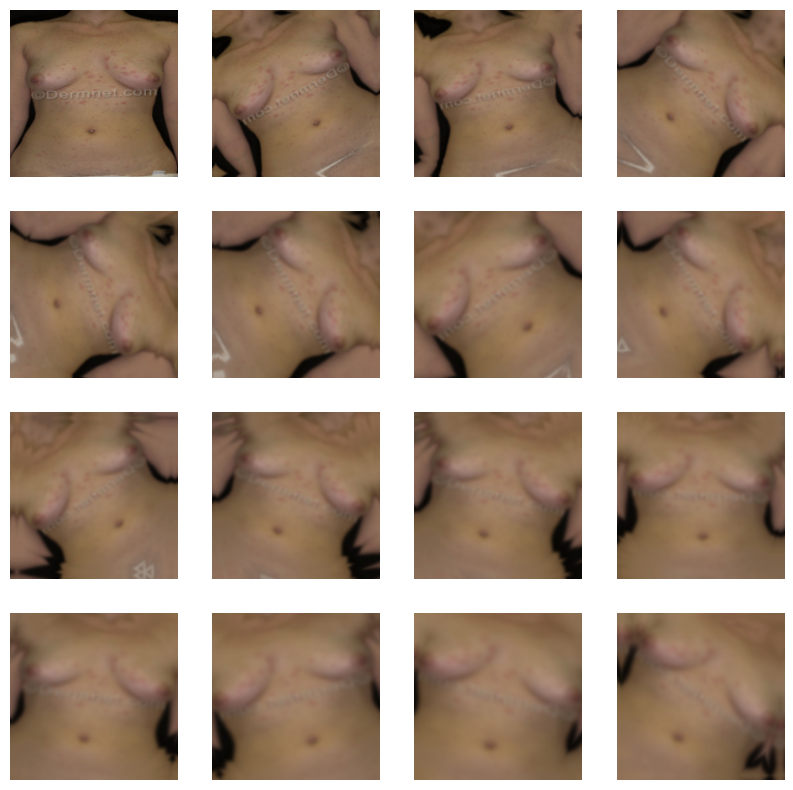

In [ ]:
k =0
plt.figure(figsize = (10,10))

for images, labels in train.take(1):
    for k in range(16):
        images = dataArgumentation(images)
        plt.subplot(4,4,k+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
rashModel = Sequential([dataArgumentation, layers.Rescaling(1./255),
                        Conv2D(16,3,padding = 'same', activation = 'relu'),
                        MaxPooling2D(),
                        Conv2D(32,3,padding = 'same', activation = 'relu'),
                        MaxPooling2D(),
                        Conv2D(64,3,padding = 'same', activation = 'relu'),
                        MaxPooling2D(),
                        Dropout(0.2),
                        Flatten(),
                        Dense(128, activation = 'relu'),
                        Dense(5)
                       ])
                        

In [ ]:
rashModel.compile(optimizer = 'adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  metrics = ['accuracy'])


In [ ]:
rashModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                 

In [ ]:
fitModel = rashModel.fit(train,epochs = 15, validation_data = validation)

Epoch 1/15
32/32 [==============================] - 36s 1s/step - loss: 1.2328 - accuracy: 0.4484 - val_loss: 1.0610 - val_accuracy: 0.5875
Epoch 2/15
32/32 [==============================] - 31s 956ms/step - loss: 0.9728 - accuracy: 0.5750 - val_loss: 0.8969 - val_accuracy: 0.6438
Epoch 3/15
32/32 [==============================] - 38s 1s/step - loss: 0.8929 - accuracy: 0.6219 - val_loss: 1.1590 - val_accuracy: 0.5125
Epoch 4/15
32/32 [==============================] - 29s 918ms/step - loss: 0.8142 - accuracy: 0.6469 - val_loss: 0.7296 - val_accuracy: 0.6625
Epoch 5/15
32/32 [==============================] - 34s 1s/step - loss: 0.7142 - accuracy: 0.6750 - val_loss: 0.7198 - val_accuracy: 0.6938
Epoch 6/15
32/32 [==============================] - 32s 1s/step - loss: 0.7025 - accuracy: 0.6859 - val_loss: 0.6162 - val_accuracy: 0.7250
Epoch 7/15
32/32 [==============================] - 31s 983ms/step - loss: 0.6655 - accuracy: 0.7063 - val_loss: 0.6621 - val_accuracy: 0.7375
Epoch 8/15


In [ ]:
import tensorflow as tf
import numpy as np

def classifyImages(image_path):
    # Load and preprocess the image
    inputImageTesting = tf.keras.utils.load_img(image_path, target_size=(200, 200))
    inputImageArray = tf.keras.utils.img_to_array(inputImageTesting)
    inputImageExpDimen = tf.expand_dims(inputImageArray, 0)  # Expand dimensions for model input

    # Make prediction
    prediction = rashModel.predict(inputImageExpDimen)
    result = tf.nn.softmax(prediction[0])

    # Get the class with the highest probability
    predicted_class = rash_names[np.argmax(result)]
     
    accuracy = accuracy_score(predicted_class)
    # Classification output
    if predicted_class == "Dermatitis":
        output = ("It's known as Dermatitis. "
                  "A general term for skin inflammation, often causing redness, swelling, and itching. "
                  "It can be triggered by allergies, irritants, or genetic factors. "
                  "Immediate attention is needed if there is severe pain, signs of infection (like pus, swelling, or fever), "
                  "or if symptoms rapidly worsen.")
    elif predicted_class == "Eczema":
        output = ("Eczema: A chronic skin condition characterized by itchy, dry, and inflamed skin. "
                  "It often flares up due to allergens, stress, or environmental factors. "
                  "Immediate attention is needed if there is severe pain, signs of infection (like pus, swelling, or fever), "
                  "or if symptoms rapidly worsen.")
    elif predicted_class == "RingWorm":
        output = ("Ringworm: It’s typically treatable at home with antifungal creams or powders. "
                  "However, if the infection is widespread or doesn't improve after treatment, "
                  "a doctor’s consultation is needed, as prescription medication may be required.")
    else:
        output = "Unknown rash type."

    return output


In [ ]:
# import tensorflow as tf
# import numpy as np

# def classifyImages(image_path):
#     # Load and preprocess the image
#     inputImageTesting = tf.keras.utils.load_img(image_path, target_size=(200, 200))
#     inputImageArray = tf.keras.utils.img_to_array(inputImageTesting)
#     inputImageExpDimen = tf.expand_dims(inputImageArray, 0)  # Expand dimensions for model input

#     # Make prediction
#     prediction = rashModel.predict(inputImageExpDimen)
#     result = tf.nn.softmax(prediction[0])

#     # Get the class with the highest probability
#     predicted_class = rash_names[np.argmax(result)]

#     # Classification output
#     if predicted_class == "Dermatitis":
#         output = ("It's known as Dermatitis. "
#                   "A general term for skin inflammation, often causing redness, swelling, and itching. "
#                   "It can be triggered by allergies, irritants, or genetic factors. "
#                   "Immediate attention is needed if there is severe pain, signs of infection (like pus, swelling, or fever), "
#                   "or if symptoms rapidly worsen.")
#     elif predicted_class == "Eczema":
#         output = ("Eczema: A chronic skin condition characterized by itchy, dry, and inflamed skin. "
#                   "It often flares up due to allergens, stress, or environmental factors. "
#                   "Immediate attention is needed if there is severe pain, signs of infection (like pus, swelling, or fever), "
#                   "or if symptoms rapidly worsen.")
#     elif predicted_class == "RingWorm":
#         output = ("Ringworm: It’s typically treatable at home with antifungal creams or powders. "
#                   "However, if the infection is widespread or doesn't improve after treatment, "
#                   "a doctor’s consultation is needed, as prescription medication may be required.")
#     else:
#         output = "Unknown rash type."

#     return output

In [ ]:
rashModel.save('Rash Identification.keras')

In [ ]:
#python -m notebook